In [1]:
import pandas as pd

In [4]:
d = pd.read_csv('dat_nk_number(1).csv',index_col=0)

In [5]:
d

,datetime,number,day,wd,ws,tem,season,weekdays,sunrise,sunset,dayNight,peak,businessday,wdays,hours,PM2.5
1,2016-10-28 09:00:00,11255.486757,2016-10-28,259.1,3.3,10.0,autumm,weekday,2016-10-28 06:47:56,2016-10-28 16:40:26,day,True,True,Friday,9,11.9
2,2016-10-28 10:00:00,13840.687694,2016-10-28,258.4,3.1,10.2,autumm,weekday,2016-10-28 06:47:56,2016-10-28 16:40:26,day,False,True,Friday,10,10.7
3,2016-10-28 11:00:00,3572.980198,2016-10-28,258.6,3.2,10.4,autumm,weekday,2016-10-28 06:47:56,2016-10-28 16:40:26,day,False,True,Friday,11,8.1
4,2016-10-28 12:00:00,3788.068175,2016-10-28,265.1,3.2,10.7,autumm,weekday,2016-10-28 06:47:56,2016-10-28 16:40:26,day,False,True,Friday,12,9.2
5,2016-10-28 13:00:00,4492.894201,2016-10-28,272.1,2.8,10.7,autumm,weekday,2016-10-28 06:47:56,2016-10-28 16:40:26,day,False,True,Friday,13,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,2017-10-06 13:00:00,4970.529126,2017-10-06,326.4,3.7,13.6,autumm,weekday,2017-10-06 06:09:54,2017-10-06 17:27:00,day,False,True,Friday,13,6.5
4176,2017-10-06 14:00:00,5440.053640,2017-10-06,323.0,3.7,13.6,autumm,weekday,2017-10-06 06:09:54,2017-10-06 17:27:00,day,False,True,Friday,14,4.4
4177,2017-10-06 15:00:00,5946.795256,2017-10-06,322.1,3.3,12.9,autumm,weekday,2017-10-06 06:09:54,2017-10-06 17:27:00,day,False,True,Friday,15,4.8
4178,2017-10-06 16:00:00,5140.833333,2017-10-06,307.9,2.1,11.6,autumm,weekday,2017-10-06 06:09:54,2017-10-06 17:27:00,day,True,True,Friday,16,2.2


In [8]:
from pycaret.regression import *
reg = setup(d,target='number',ignore_features=['datetime','day','sunrise','sunset']
                                                ,normalize_method = 'minmax'
                                                ,normalize=True
                                                ,ignore_low_variance=True,remove_multicollinearity=True
                                                ,session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4179, 16)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,2159.6889,10553867.1764,3223.1246,0.6494,0.3434,0.2948,0.2729
1,CatBoost Regressor,2384.8523,11992814.0384,3437.8145,0.6004,0.3805,0.3326,2.0106
2,Random Forest,2412.0585,12736409.8932,3542.3933,0.5775,0.3778,0.3349,0.3549
3,Light Gradient Boosting Machine,2492.2353,13152811.5903,3599.9783,0.5615,0.3857,0.3423,0.0959
4,Extreme Gradient Boosting,2528.2963,13707226.0151,3678.8937,0.5432,0.3988,0.3414,0.1705
5,Gradient Boosting Regressor,2794.2442,15664115.9799,3932.8589,0.4773,0.4358,0.4065,0.3342
6,K Neighbors Regressor,2992.8004,19076551.4725,4351.1333,0.3607,0.4504,0.4042,0.0165
7,Linear Regression,3303.2756,20765892.3224,4536.3635,0.3046,0.5107,0.4876,0.0093
8,Least Angle Regression,3303.5190,20768990.8658,4536.5128,0.3046,0.5138,0.4884,0.0128
9,Lasso Regression,3303.5615,20774335.7929,4537.1568,0.3044,0.5120,0.4876,0.0277


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [10]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2070.3257,8633956.1099,2938.3594,0.7173,0.3481,0.3093
1,2201.7483,11909503.8296,3451.0149,0.6144,0.3573,0.3201
2,2061.1218,8564509.1325,2926.5183,0.6334,0.3261,0.2814
3,2115.2718,8519481.0970,2918.8150,0.7086,0.3268,0.2833
4,2341.9237,18217929.8891,4268.2467,0.5460,0.3554,0.2890
5,2079.2743,9970184.1002,3157.5598,0.6807,0.3472,0.2991
6,2079.4135,8489229.4393,2913.6282,0.7076,0.3392,0.2828
7,2259.0781,10884230.7247,3299.1258,0.6416,0.3567,0.2961
8,2011.8169,8506501.4116,2916.5907,0.6665,0.3255,0.2794
9,2376.9149,11843146.0301,3441.3872,0.5781,0.3521,0.3075


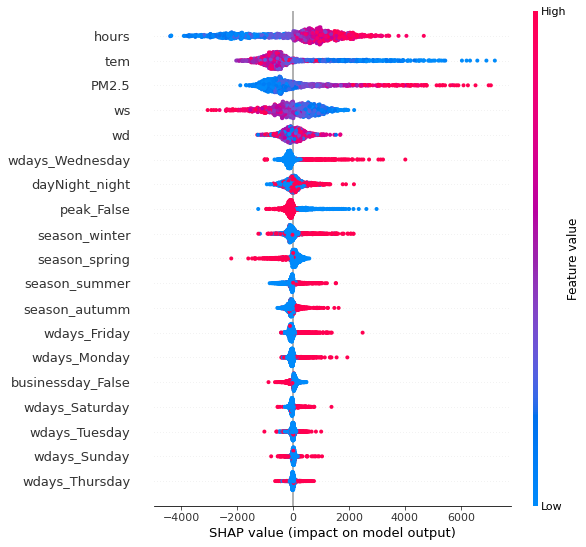

In [15]:
interpret_model(et)

In [16]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2253.0270,9933883.2007,3151.8063,0.6748,0.3867,0.3522
1,2384.8313,13058784.1129,3613.6940,0.5772,0.3946,0.3648
2,2357.5443,10799949.4953,3286.3277,0.5377,0.3702,0.3302
3,2398.4479,9643651.2372,3105.4229,0.6701,0.3738,0.3307
4,2638.5779,20845066.2306,4565.6397,0.4805,0.3944,0.3197
5,2384.6469,11390059.7699,3374.9163,0.6352,0.3928,0.3557
6,2282.8332,9697003.8557,3114.0013,0.6660,0.3561,0.3034
7,2344.9031,11174910.7033,3342.8896,0.6320,0.3654,0.3021
8,2278.1592,10128093.8974,3182.4666,0.6029,0.3830,0.3308
9,2525.5519,13256737.8813,3640.9803,0.5278,0.3884,0.3367


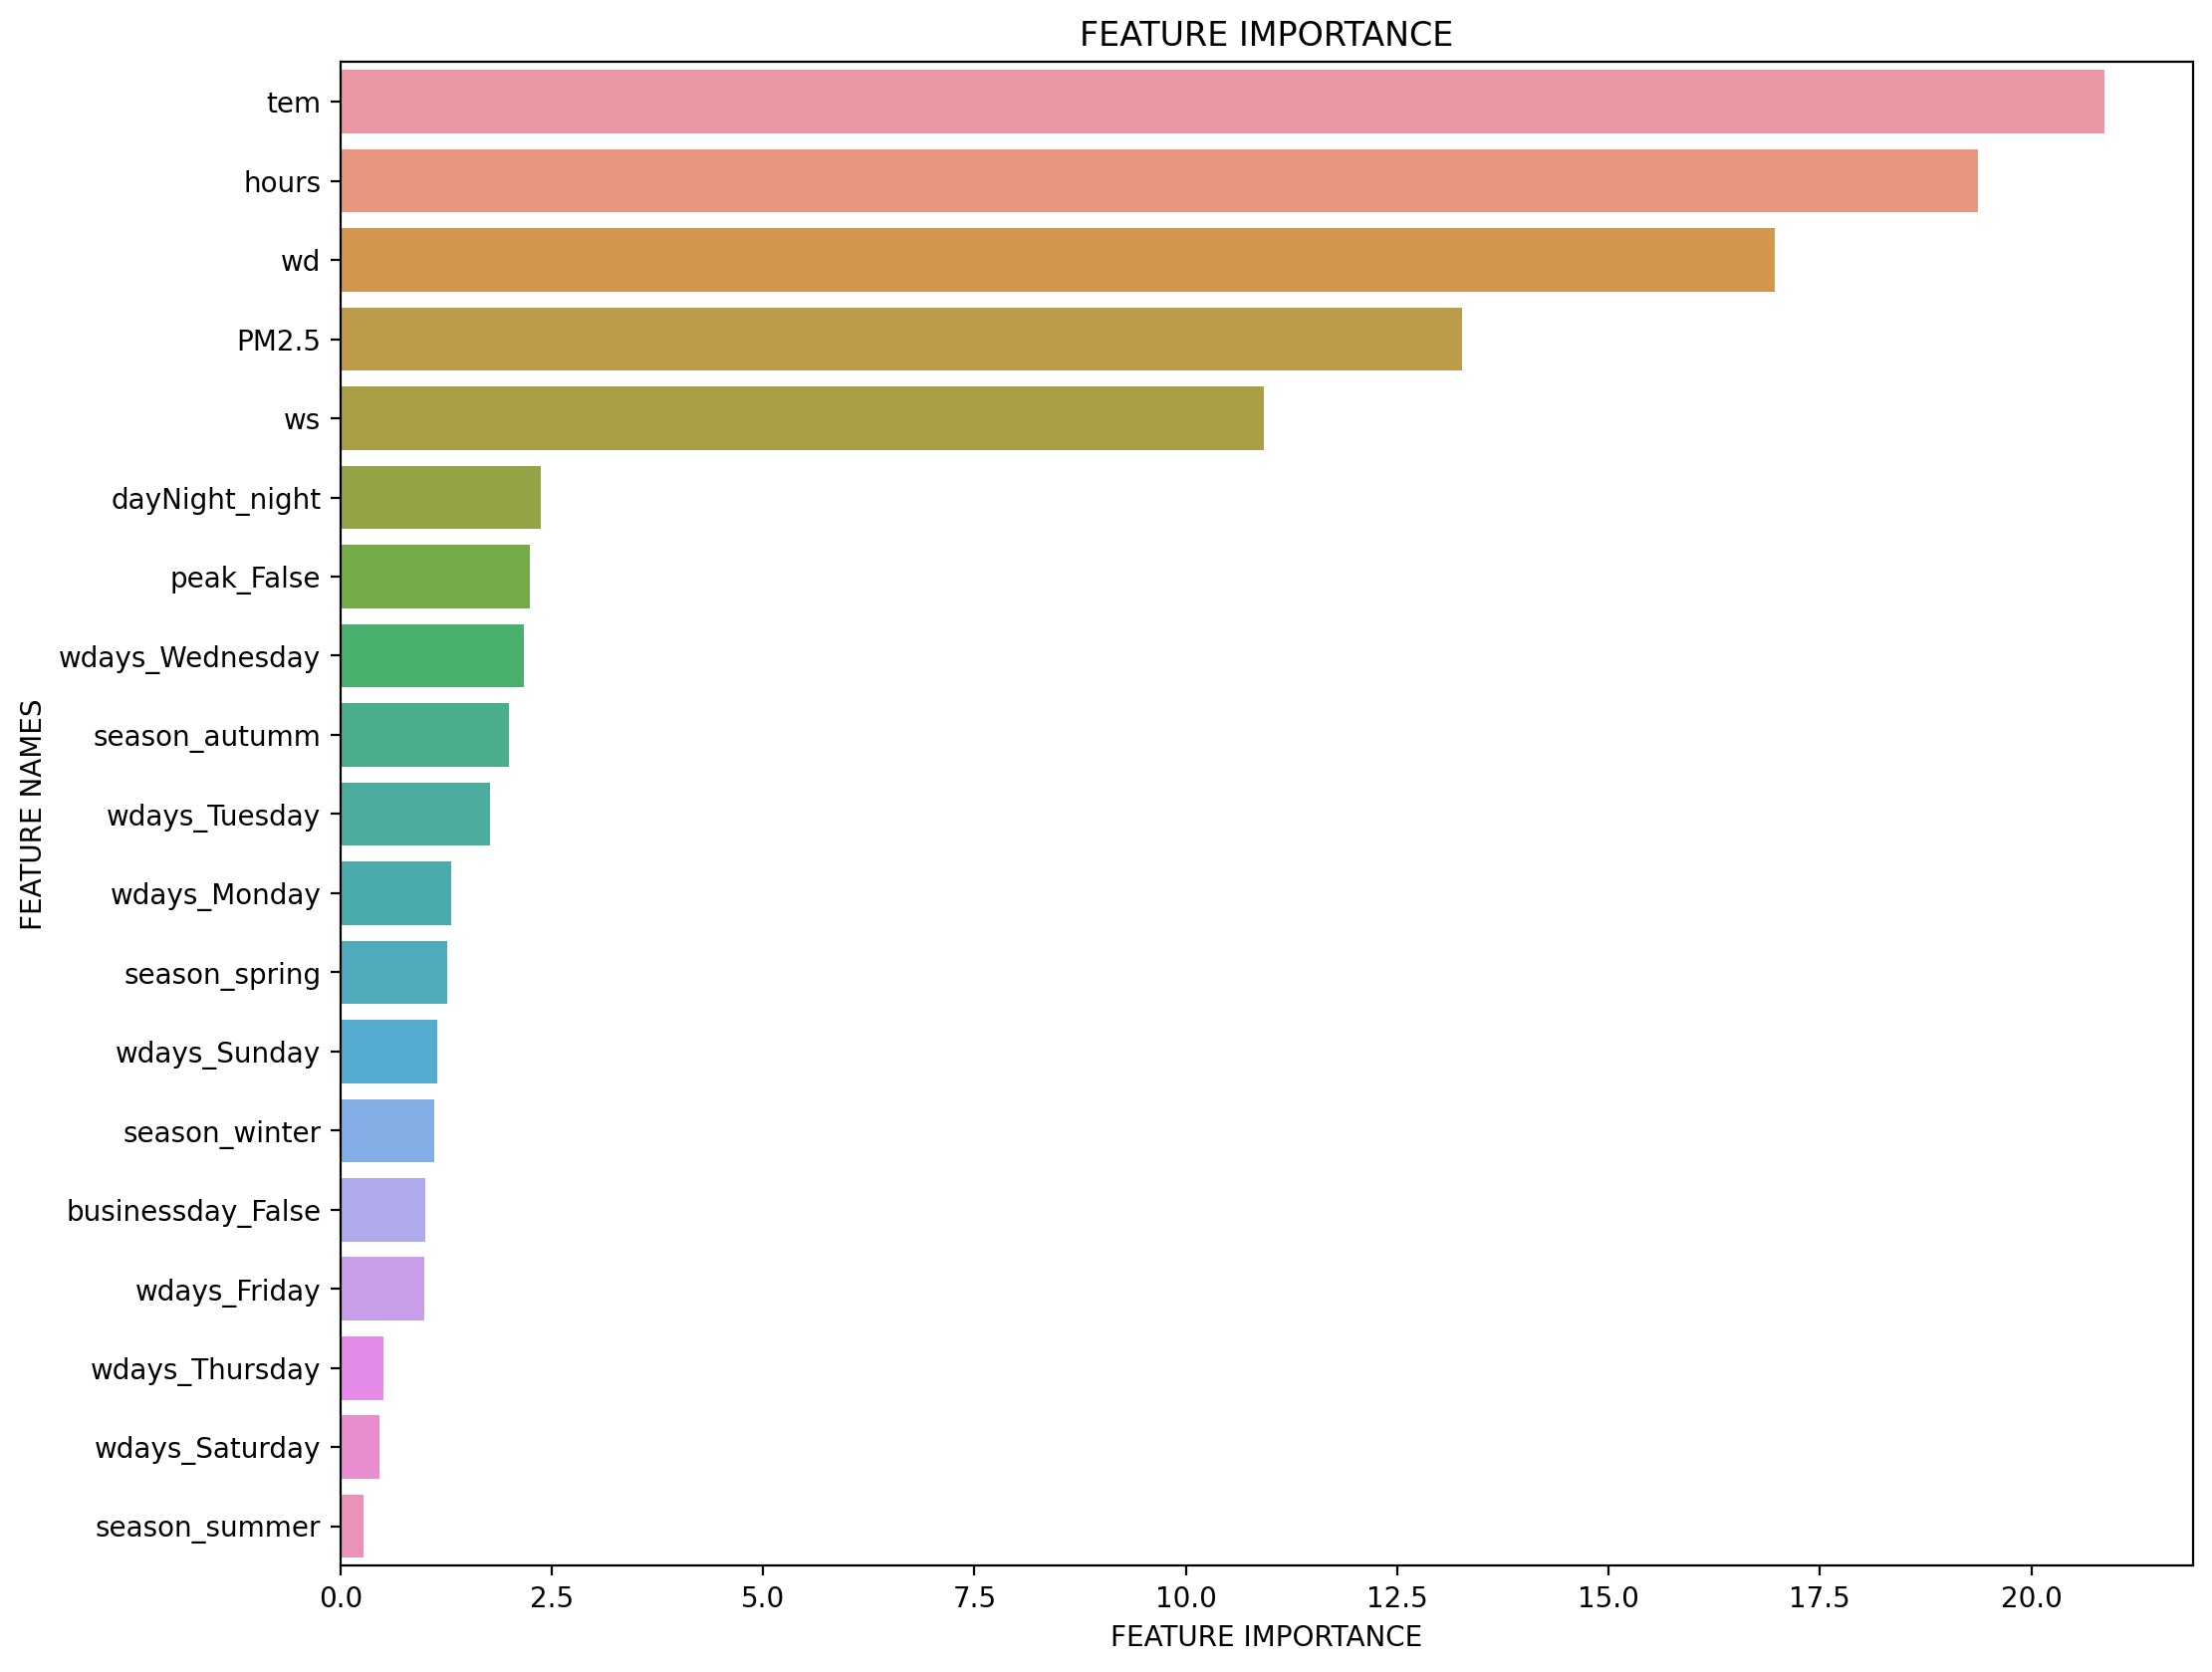

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)


    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


    plt.figure(figsize=(12,10),dpi=200)

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(cat.feature_importances_,cat.feature_names_,'')